# Author : Tanzil Baraskar

# Task 2 : Prediction using Unsupervised Machine Learning

## GRIP @ The Sparks Foundation
### In this K-means clustering task I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.


**Technical Stack:**  
- Scikit Learn
- NumPy Array
- Pandas
- Matplotlib

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA 



In [3]:
iris = datasets.load_iris()
print(iris.data[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [4]:
x = iris.data  # Features
y = iris.target  # Target

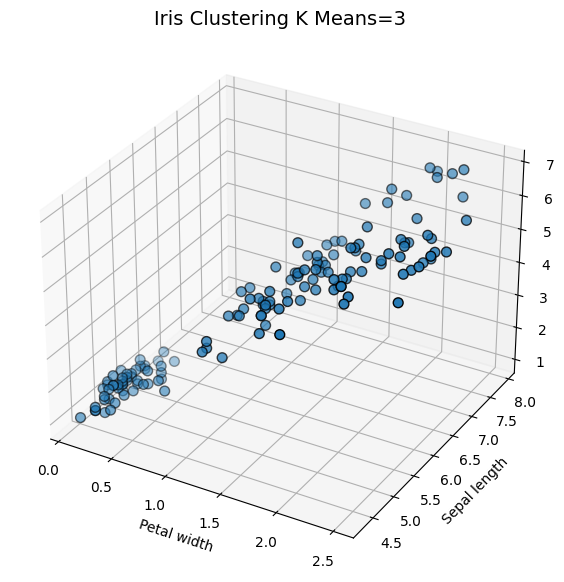

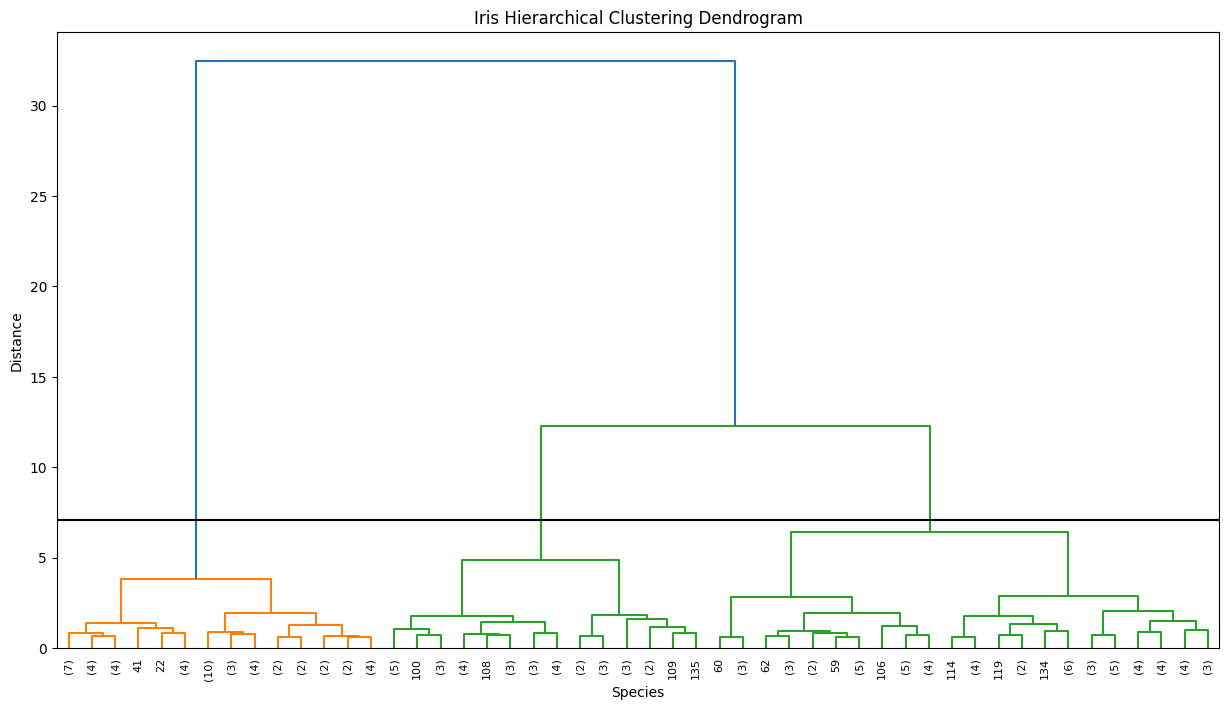

In [5]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 3], x[:, 0], x[:, 2], edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Iris Clustering K Means=3", fontsize=14)
plt.show()

# Hierarchical Clustering
hier = linkage(x, "ward")
max_d = 7.08
plt.figure(figsize=(15, 8))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram(
    hier,
    truncate_mode='lastp',
    p=50,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()


### Step 3 - Data Preprocessing


In [7]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [8]:
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


### Step 4 - Model Training

In [10]:
iris_mean_model = KMeans(n_clusters=3)
iris_mean_model.fit(x)

c:\Users\tbara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [12]:
print(iris_mean_model.cluster_centers_)


[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


### Step 5 - Visualizing the Model Cluster

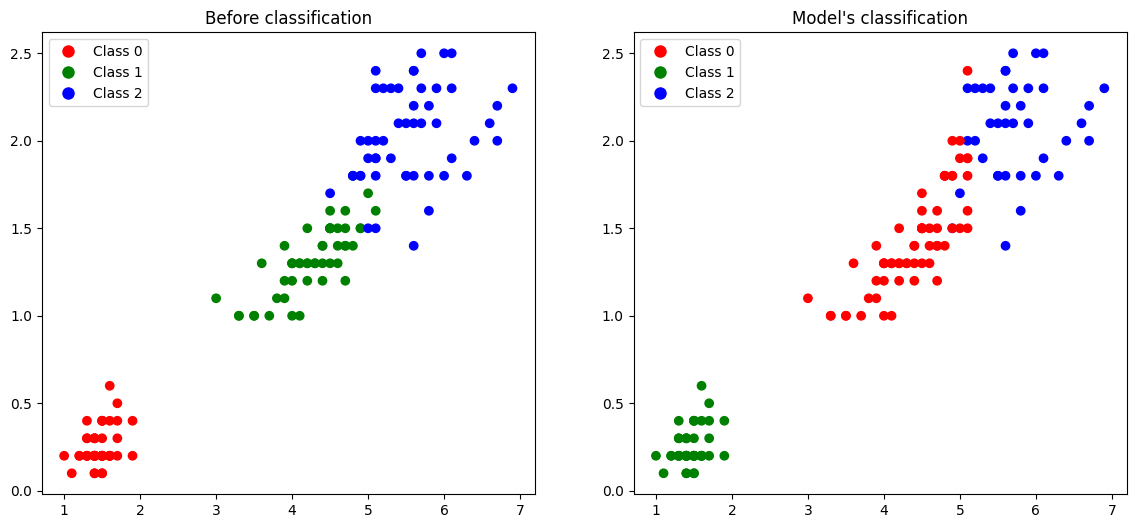

In [14]:


red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Class 0')
green_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Class 1')
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class 2')

plt.figure(figsize=(14,6))

predictedY = np.choose(iris_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.show()


### Step 6 - Calculating the Accuracy and Confusion Matrix

In [15]:
sm.accuracy_score(predictedY, y['Target'])

0.24

In [16]:
sm.confusion_matrix(predictedY, y['Target'])


array([[ 0, 48, 14],
       [50,  0,  0],
       [ 0,  2, 36]], dtype=int64)

### The confusion matrix arranges the predicted class labels (0, 1, 2) across the top (column headings) and the true class labels (Iris-setosa, etc.) down the right side. Each cell within the matrix represents the count of instances where a true class was classified into each predicted class.

## Conclusion
### I successfully conducted prediction using an Unsupervised Machine Learning approach and evaluated the model's clustering accuracy score.


## Thank You